# **The business problem.**

An airline seeks to improve their performance by enhancing passenger satisfaction.  The airline will evaluate past recommendations and model it against different data points to further narrow down the certain areas for optimal improvement.

As an airline seeks to enhance passenger satisfaction to improve its performance, it addresses a multifaceted issue that affects various stakeholders. Primarily, passengers themselves are directly impacted by the quality of service provided. Unsatisfactory experiences can lead to frustration, decreased loyalty, and even a reluctance to fly with the airline again. Additionally, employees within the airline, from ground staff to flight attendants, also feel the repercussions of dissatisfied customers through increased stress and potential negative feedback. From a financial perspective, low passenger satisfaction can result in decreased revenue due to reduced ticket sales and additional costs associated with customer service efforts to address complaints. Conversely, a potential solution involving improved services, enhanced amenities, and better communication can lead to increased customer retention, positive word-of-mouth advertising, and ultimately, higher profitability.


**Ways in which this model is applicable**

1) **From an airline customer(passenger's) perspective** - Our model is useful to passengers' as it may help them to make more informed and correct decisions when booking flights. By using our flight recommendation model, flight passengers can choose airlines that align with their personal preferences and expectations confidently.

2) **From an airline employee viewpoint** - In improvement programs, airline employees can use our model know which areas i.e food and drinks, seat comfort to focus on to help the airline enhance more customer satisfaction. They may also learn which areas the company is doing well and continue with even better services. This effort may lead to even better service delivery, low employee turnover and more flight  recommendations

3)  **From a financial viewpoint** - Senior management and airline stakeholders can use our model to know which departments within the company needs improvement based on customer feedback and overall recommendations. This is very useful when in comes to financial, manpower and resources allocations. This allocations have a very huge impact on the marketing, human resources and financial bottom lines. Airlines that use our model to get more recommendations may experience more revenues.

4) **From a social perspective** - Airlines using our model can identify which areas to upgrade and adjust to increase customer satisfaction. On a broader perspective, this creates more positive brand recognition, more customer loyalty, winning skyteam awards, increased ability to attract and retain talent and more business partnerships.

In [ ]:
# Importing all the required packages and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
import seaborn as sns
import math


In [ ]:
#Importing and loading the  dataset
from google.colab import files
uploaded = files.upload()

import io
airline_data = pd.read_csv(io.BytesIO(uploaded['airlines_reviews.csv']))

Saving airlines_reviews.csv to airlines_reviews.csv


In [ ]:

airline_data.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [ ]:

# Columns contained in dataset
airline_data.columns

Index(['Title', 'Name', 'Review Date', 'Airline', 'Verified', 'Reviews',
       'Type of Traveller', 'Month Flown', 'Route', 'Class', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended'],
      dtype='object')

<Axes: >

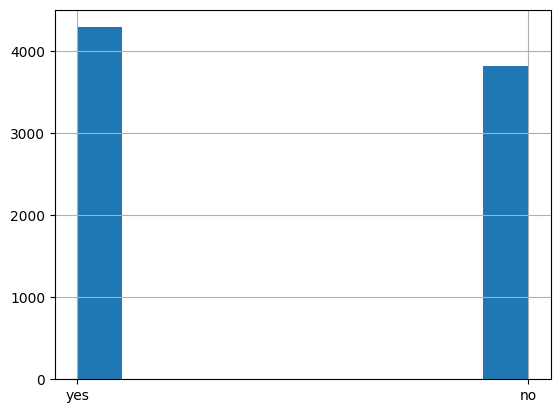

In [ ]:
airline_data.Recommended.hist()

In [ ]:
airline_data['Recommended'].value_counts()

Recommended
yes    4287
no     3813
Name: count, dtype: int64

<Axes: >

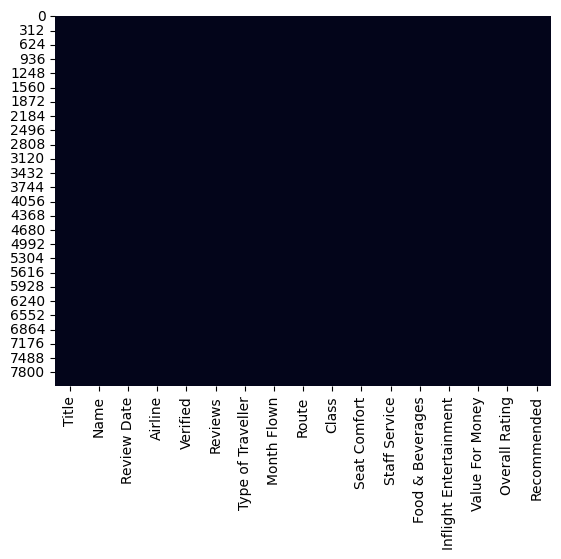

In [ ]:
sns.heatmap(airline_data.isnull(), cbar=False)

In [ ]:
# Replace 'yes' with 1 and 'no' with 0 in the 'Recommended' column
airline_data['Recommended'] = airline_data['Recommended'].replace({'yes': 1, 'no': 0})


#changing the verified column from true false to 1 or 0
airline_data['Verified'] = airline_data['Verified'].replace ({'True': 1, 'False': 0 })


In [ ]:
airlines_data = airline_data.drop(['Title','Name','Reviews','Route','Review Date','Month Flown'],axis=1, inplace = False)

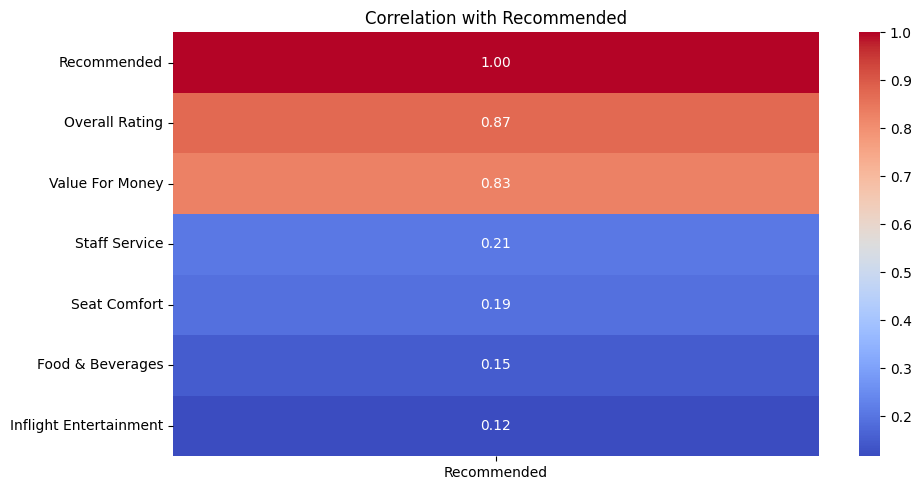

In [ ]:
numeric_columns = airlines_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Sort correlation matrix by correlation with 'Recommended' column
correlation_with_recommended = correlation_matrix['Recommended'].abs().sort_values(ascending=False)
sorted_correlation_matrix = correlation_matrix.loc[correlation_with_recommended.index, ['Recommended']]

# Plot correlation matrix
plt.figure(figsize=(10, 5))
corr_plot = sns.heatmap(sorted_correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation with Recommended')
plt.tight_layout()
plt.show()


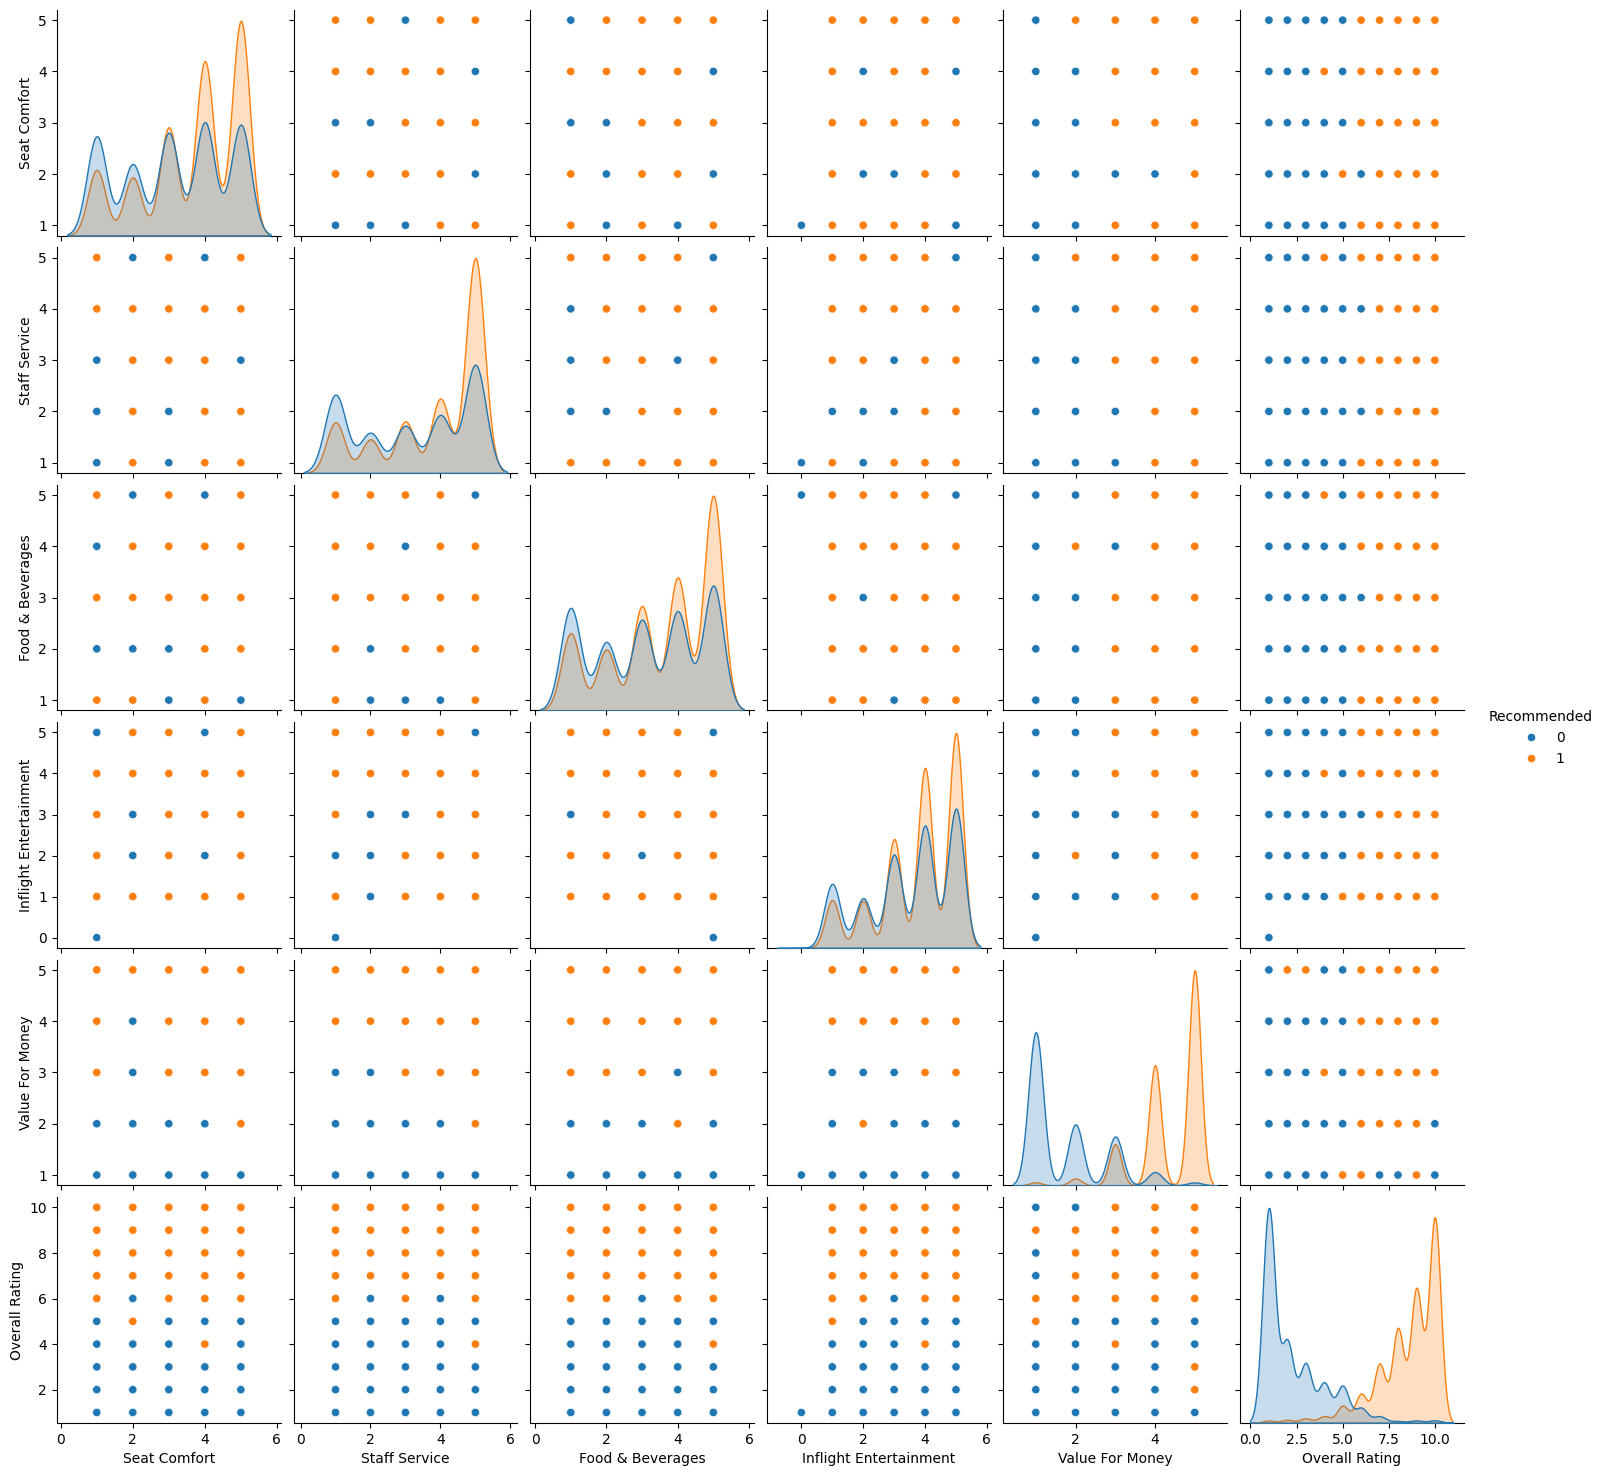

In [ ]:
sns.pairplot(airlines_data, hue = 'Recommended')

In [ ]:
airlines_data.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469,0.529259
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664,0.499174
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,1.000000


In [ ]:
# Convert all boolean columns to integers
for col in airlines_data.columns:
    if airlines_data[col].dtype == 'bool':
        airlines_data[col] = airlines_data[col].astype(int)

In [ ]:
airlines_data.dtypes

Airline                   object
Verified                  object
Type of Traveller         object
Class                     object
Seat Comfort               int64
Staff Service              int64
Food & Beverages           int64
Inflight Entertainment     int64
Value For Money            int64
Overall Rating             int64
Recommended                int64
dtype: object

# **Target Variable Distribution**

In [ ]:
X = airlines_data.drop('Recommended', axis=1)
y = airlines_data['Recommended']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
# Convert all boolean columns to integers
for col in airlines_data.columns:
    if airlines_data[col].dtype == 'bool':
        airlines_data[col] = airlines_data[col].astype(int)


In [ ]:

X.columns

Index(['Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Airline_Air France', 'Airline_All Nippon Airways',
       'Airline_Cathay Pacific Airways', 'Airline_EVA Air', 'Airline_Emirates',
       'Airline_Japan Airlines', 'Airline_Korean Air', 'Airline_Qatar Airways',
       'Airline_Singapore Airlines', 'Airline_Turkish Airlines', 'Verified_0',
       'Verified_1', 'Verified_*Unverified*', 'Verified_NotVerified',
       'Verified_we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us',
       'Type of Traveller_Business', 'Type of Traveller_Couple Leisure',
       'Type of Traveller_Family Leisure', 'Type of Traveller_Solo Leisure',
       'Class_Business Class', 'Class_Economy Class', 'Class_First Class',
       'Class_Premium 

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Recommended, dtype: int64

# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:

X_rescaled.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Airline_Air France,Airline_All Nippon Airways,Airline_Cathay Pacific Airways,Airline_EVA Air,...,Verified_NotVerified,Verified_we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us,Type of Traveller_Business,Type of Traveller_Couple Leisure,Type of Traveller_Family Leisure,Type of Traveller_Solo Leisure,Class_Business Class,Class_Economy Class,Class_First Class,Class_Premium Economy
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,...,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,0.603704,0.642469,0.596019,0.727358,0.537160,0.514719,0.098519,0.031852,0.091852,0.034691,...,0.000123,0.000123,0.174444,0.234444,0.191481,0.399630,0.259753,0.679506,0.014938,0.045802
std,0.349296,0.381859,0.363923,0.261913,0.397344,0.391518,0.298033,0.175616,0.288835,0.183008,...,0.011111,0.011111,0.379515,0.423677,0.393491,0.489852,0.438526,0.466695,0.121313,0.209069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.600000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.750000,0.750000,0.750000,0.800000,0.500000,0.555556,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.888889,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X.columns

Index(['Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Airline_Air France', 'Airline_All Nippon Airways',
       'Airline_Cathay Pacific Airways', 'Airline_EVA Air', 'Airline_Emirates',
       'Airline_Japan Airlines', 'Airline_Korean Air', 'Airline_Qatar Airways',
       'Airline_Singapore Airlines', 'Airline_Turkish Airlines', 'Verified_0',
       'Verified_1', 'Verified_*Unverified*', 'Verified_NotVerified',
       'Verified_we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us',
       'Type of Traveller_Business', 'Type of Traveller_Couple Leisure',
       'Type of Traveller_Family Leisure', 'Type of Traveller_Solo Leisure',
       'Class_Business Class', 'Class_Economy Class', 'Class_First Class',
       'Class_Premium 

# **Decision trees**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

# Initialize the DecisionTree classifier
dt_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[1051,   81],
       [  70, 1228]])

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1132
           1       0.94      0.95      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430



In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy:", accuracy)


Accuracy: 0.9378600823045268


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,dt_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9734373213478742


we have an roc auc of 97.34%, which indicates that our decision tree model has high discriminative power between the different instances

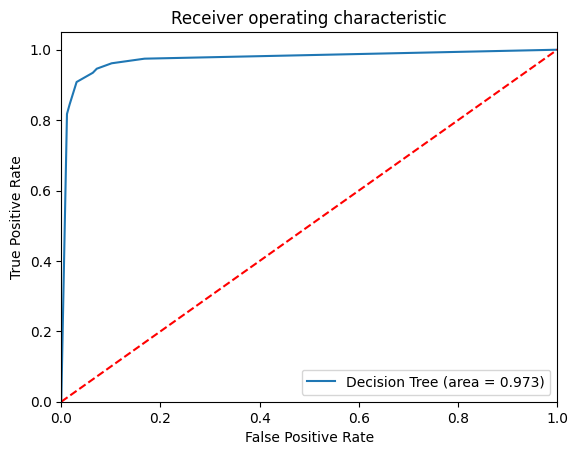

In [ ]:

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.3f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


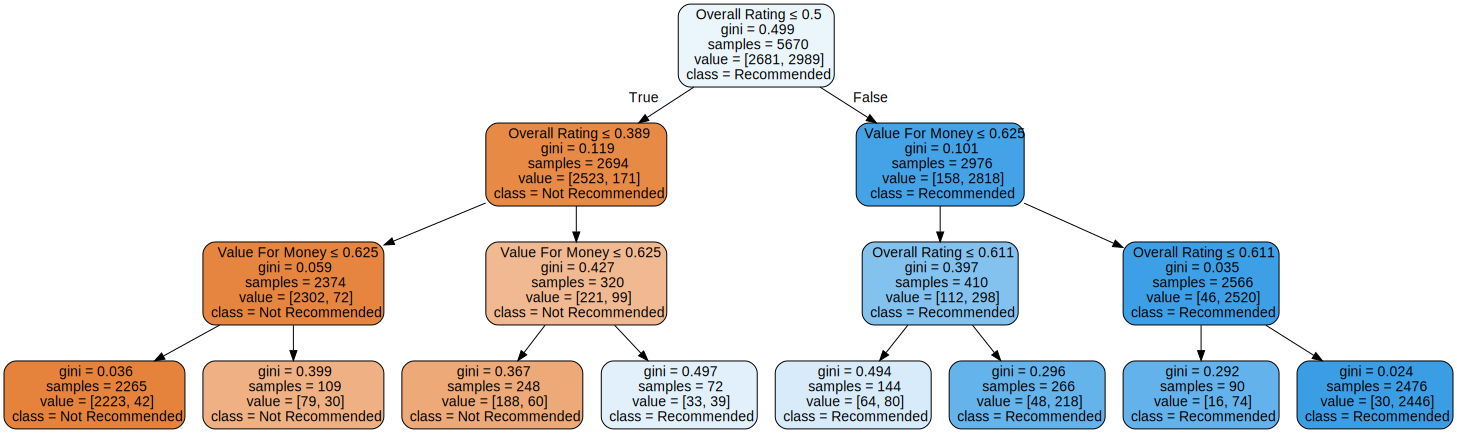

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None,
                      feature_names=X.columns,
                      class_names=['Not Recommended','Recommended'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

# **Random forest**

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(max_depth=5, random_state=0)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[1048,   84],
       [  64, 1234]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1132
           1       0.94      0.95      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430



In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy:", accuracy)


Accuracy: 0.9390946502057613


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9787244034039866


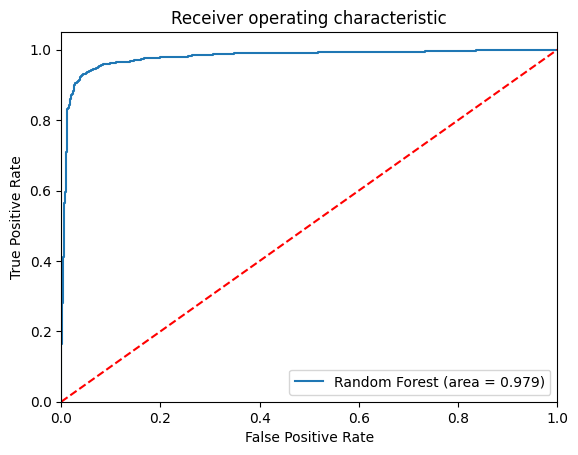

In [ ]:
# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# **Boosted tree model**

In [ ]:
# Build the Boosted Tree Model (AdaBoostClassifier)
bt_model = AdaBoostClassifier(n_estimators=100)
bt_model.fit(X_train, y_train)

# Predict probabilities
y_probs_bt = bt_model.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_bt = (y_probs_bt > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_bt)
print("Confusion Matrix:")
print(cm)

# Calculate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bt))

accuracy = accuracy_score(y_test, y_pred_bt)
print("\nAccuracy:", accuracy)

# Calculate ROC AUC score
bt_roc_auc = roc_auc_score(y_test, y_probs_bt)
print("\nROC AUC Score for Boosted Tree:", bt_roc_auc)


bt_fpr, bt_tpr, thresholds_bt = roc_curve(y_test, y_probs_bt)


Confusion Matrix:
[[1064   68]
 [  80 1218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1132
           1       0.95      0.94      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430


Accuracy: 0.9390946502057613

ROC AUC Score for Boosted Tree: 0.9816784588412725


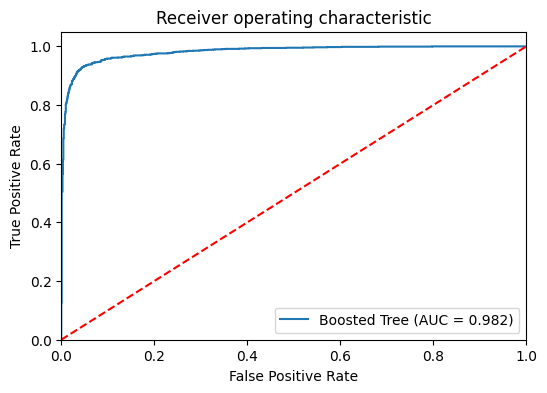

In [ ]:


# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree (AUC = %0.3f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# **Multiple linear regression**

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(valid_X)


In [ ]:
Linearmodel = LinearRegression()

Linearmodel.fit(train_X, train_y)

LinearRegression()

In [ ]:
Linearmodel.intercept_

-0.14236137426847495

In [ ]:
Linearmodel.coef_

array([ 3.43648074e-03,  2.27318145e-03,  1.65005968e-03, -2.05651101e-03,
        8.06696477e-02,  9.17106988e-02,  1.22508465e-02,  3.77902141e-03,
        1.04651917e-02, -4.40574662e-03, -1.90247266e-02, -1.71423162e-02,
        2.23264144e-03, -1.05077364e-02,  7.81918591e-03,  1.45336389e-02,
       -1.23740575e-01, -1.15366472e-01,  2.39107047e-01,  5.55111512e-17,
        2.88831459e-16,  1.00782909e-03, -1.22084601e-02,  4.00046154e-03,
        7.20016945e-03,  1.43197067e-02, -9.24357524e-03, -3.72132420e-03,
       -1.35480721e-03])

In [ ]:
y_pred_Linear = Linearmodel.predict(valid_X)

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score
y_pred_Linear = Linearmodel.predict(valid_X)
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, y_pred_Linear))
print('MAE: ', mean_absolute_error(valid_y, y_pred_Linear))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, y_pred_Linear)))
print('Max error: ', max_error(valid_y, y_pred_Linear))

Regression model performance evaluation
R2:  0.7691480848924412
MAE:  0.1632370417926351
RMSE:  0.2396740567882687
Max error:  1.0895775980945372


# **Logistic regression**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

# Initialize the Logistic Regression model
logmodel = LogisticRegression(solver='liblinear')

# Train the model
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#predict probabilities
y_probs = logmodel.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.5).astype(int)


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:



# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1062   70]
 [  80 1218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1132
           1       0.95      0.94      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.9382716049382716


In [ ]:
# Calculate ROC AUC score
log_roc_auc = roc_auc_score(y_test, y_probs)
print("\nROC AUC Score for Logistic Regression:", log_roc_auc)


ROC AUC Score for Logistic Regression: 0.982300168239259


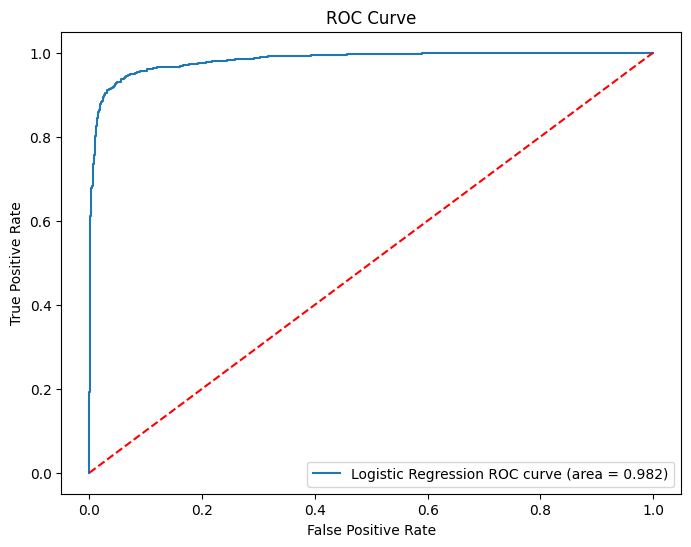

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,  label='Logistic Regression ROC curve (area = %0.3f)' % log_roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Knn model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1062   70]
 [  80 1218]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1132
           1       0.95      0.94      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430



In [ ]:

print('ROC AUC: ', roc_auc_score(y_test,y_pred_knn))

ROC AUC:  0.905984744129321


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [ ]:
cv_scores[:5]

[0.8908289241622575,
 0.8811287477954146,
 0.9024691358024691,
 0.8980599647266315,
 0.9063492063492063]

<Axes: >

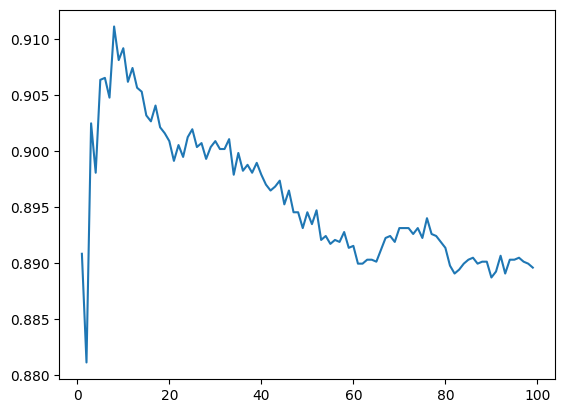

In [ ]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
# Find the index of the maximum ROC AUC value
optimal_k_index = np.argmax(cv_scores)

# Retrieve the optimal k value
# Adding 1 because K ranges from 1 to max_K, not from 0 to max_K-1
optimal_k = optimal_k_index + 1


max_roc_auc = cv_scores[optimal_k_index]


print('Optimal k :', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)

Optimal k : 8
Maximum ROC AUC: 0.9111111111111111


# **Optimized Model with k=8**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[1021  111]
 [ 108 1190]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1132
           1       0.91      0.92      0.92      1298

    accuracy                           0.91      2430
   macro avg       0.91      0.91      0.91      2430
weighted avg       0.91      0.91      0.91      2430



In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy:", accuracy)


Accuracy: 0.9098765432098765


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))

ROC AUC:  0.957430431160742


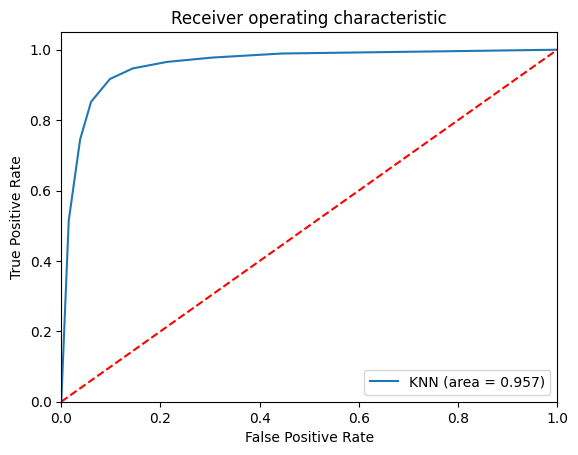

In [ ]:
# kNN Model
kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.3f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Naive Bayes Model**

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=12fc97f18f6bec488c1a6e3ac18e83443241234b36587db58678d40aaa00bbef
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Train the Naive Bayes classifier
Naive_bayes_pred = MultinomialNB(alpha=0.01)
Naive_bayes_pred.fit(X_train, y_train)

# Predictions
y_pred = Naive_bayes_pred.predict(X_test)

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[1072  170]
 [  60 1371]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1242
           1       0.89      0.96      0.92      1431

    accuracy                           0.91      2673
   macro avg       0.92      0.91      0.91      2673
weighted avg       0.92      0.91      0.91      2673



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.9139543583988028


In [ ]:
# Predict probabilities
y_probs = Naive_bayes_pred.predict_proba(X_test)[:, 1]

# Predictions
y_pred = Naive_bayes_pred.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC score
nb_roc_auc = roc_auc_score(y_test, y_probs)

# Compute ROC curve
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, y_probs)

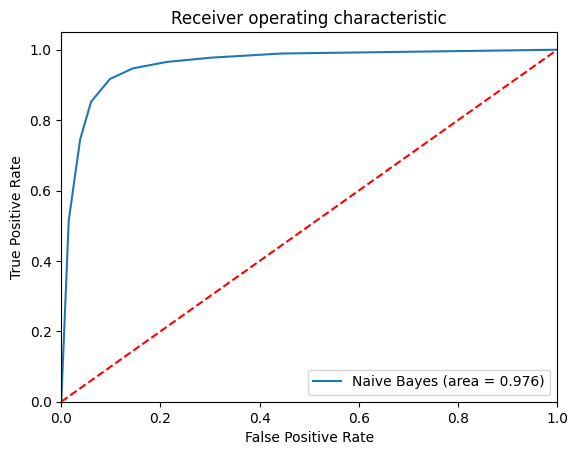

In [ ]:
# Plot ROC curve with accuracy as the title
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='Naive Bayes (area = %0.3f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Naive_bayes_pred, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3600 ± 0.0264,Overall Rating
0.0200 ± 0.0034,Value For Money
0.0061 ± 0.0025,Airline_Emirates
0.0045 ± 0.0064,Airline_Turkish Airlines
0.0034 ± 0.0019,Type of Traveller_Couple Leisure
0.0022 ± 0.0005,Airline_Qatar Airways
0.0017 ± 0.0010,Type of Traveller_Solo Leisure
0.0016 ± 0.0039,Food & Beverages
0.0013 ± 0.0011,Airline_All Nippon Airways
0.0010 ± 0.0006,Class_Premium Economy


the top  features that determine our target variable include overall rating, value for money, and class type.

<ipython-input-119-1e062649ea3b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Overall Rating', y='Recommended', data=airlines_data, ci=None)


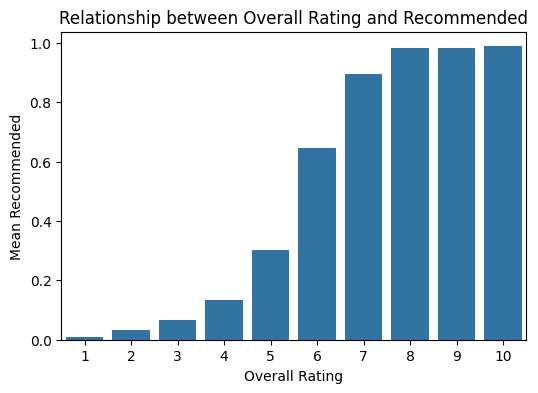

In [ ]:
# Plot the relationship between Overall Rating and Recommended
plt.figure(figsize=(6, 4))
sns.barplot(x='Overall Rating', y='Recommended', data=airlines_data, ci=None)
plt.title('Relationship between Overall Rating and Recommended')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Recommended')
plt.show()


<ipython-input-120-7c20bdff4e0b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Value For Money', y='Recommended', data=airlines_data, ci=None)


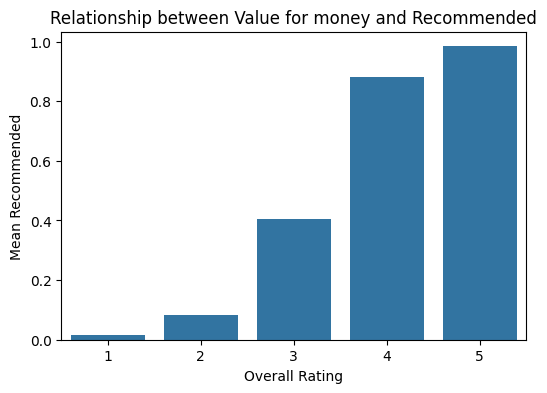

In [ ]:
# Plot the relationship between value for money and Recommended
plt.figure(figsize=(6, 4))
sns.barplot(x='Value For Money', y='Recommended', data=airlines_data, ci=None)
plt.title('Relationship between Value for money and Recommended')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Recommended')
plt.show()

<ipython-input-121-0a763bb2aa30>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Staff Service', y='Recommended', data=airlines_data, ci=None)


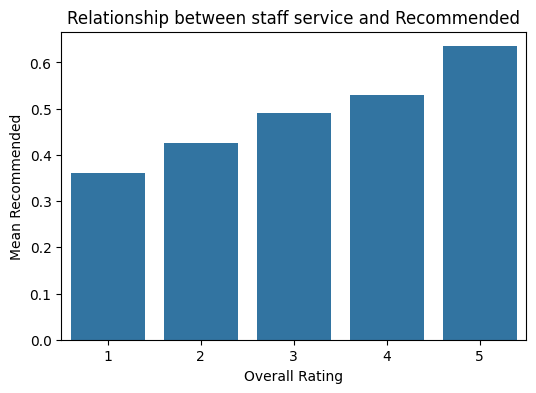

In [ ]:
# Plot the relationship between staff service for money and Recommended
plt.figure(figsize=(6, 4))
sns.barplot(x='Staff Service', y='Recommended', data=airlines_data, ci=None)
plt.title('Relationship between staff service and Recommended')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Recommended')
plt.show()

<ipython-input-122-a10ca2c191a3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type of Traveller', y='Recommended', data=airlines_data, ci=None)


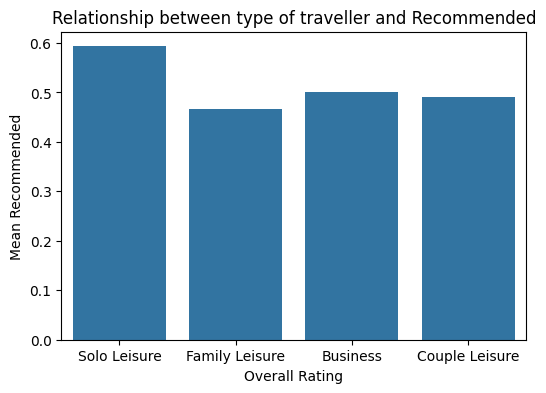

In [ ]:
# Plot the relationship between travel type for money and Recommended
plt.figure(figsize=(6, 4))
sns.barplot(x='Type of Traveller', y='Recommended', data=airlines_data, ci=None)
plt.title('Relationship between type of traveller and Recommended')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Recommended')
plt.show()

# **Artificial Neural Networks**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled,y,test_size=0.30,random_state=1)

In [ ]:
# Developing Multilayer Perceptron (MLP) classifier model with number of nodes in hidden layer n=20

MLPC_model = MLPClassifier(hidden_layer_sizes=17, activation='logistic', solver='adam', max_iter=500, learning_rate_init=0.001, random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1067   65]
 [  80 1218]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1132
           1       0.95      0.94      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9825478991871158


In [ ]:

min_hidden_layer_size = 5
max_hidden_layer_size = 100
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='adam', max_iter=500, learning_rate_init=0.001, random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

opt_nodes = cv_scores.index(max(cv_scores))+5
opt_nodes

20

<Axes: >

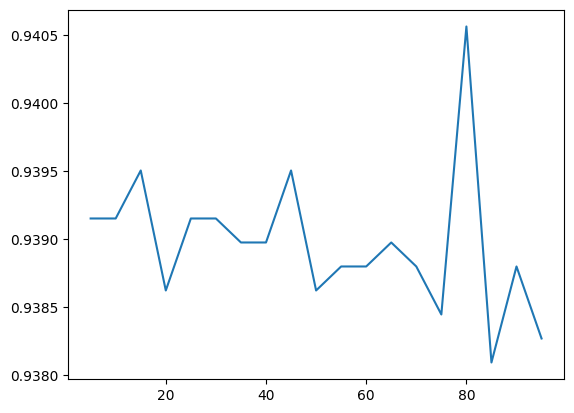

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', max_iter=500, learning_rate_init=0.001, random_state=1)

MLPC_model.fit(X_train, y_train)

Y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1067   65]
 [  80 1218]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1132
           1       0.95      0.94      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430



In [ ]:
accuracy = accuracy_score(y_test, y_pred_mlpc)
print("\nAccuracy:", accuracy)


Accuracy: 0.9403292181069959


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9825431351304261


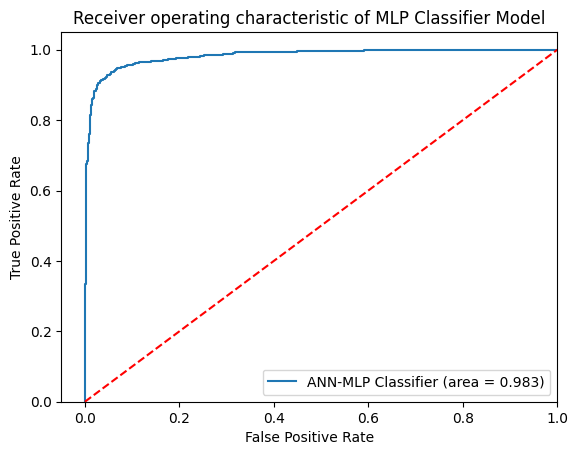

In [ ]:

MLPC_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1])
mlpc_fpr, mlpc_tpr, thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ANN-MLP Classifier (area = %0.3f)' % MLPC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of MLP Classifier Model')
plt.legend(loc="lower right")
plt.savefig('MLPC_ROC')
plt.show()

# **Keras Classification**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled,y,test_size=0.30,random_state=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train.shape

(5670, 29)

In [ ]:
model = Sequential()

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
# For a binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=64,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
89/89 [==============================] - 3s 9ms/step - loss: 0.6479 - val_loss: 0.4944
Epoch 2/200
89/89 [==============================] - 1s 6ms/step - loss: 0.4328 - val_loss: 0.2019
Epoch 3/200
89/89 [==============================] - 0s 3ms/step - loss: 0.2596 - val_loss: 0.1714
Epoch 4/200
89/89 [==============================] - 0s 3ms/step - loss: 0.2208 - val_loss: 0.1653
Epoch 5/200
89/89 [==============================] - 0s 3ms/step - loss: 0.2085 - val_loss: 0.1653
Epoch 6/200
89/89 [==============================] - 0s 3ms/step - loss: 0.1949 - val_loss: 0.1656
Epoch 7/200
89/89 [==============================] - 0s 3ms/step - loss: 0.1875 - val_loss: 0.1646
Epoch 8/200
89/89 [==============================] - 0s 3ms/step - loss: 0.1877 - val_loss: 0.1688
Epoch 9/200
89/89 [==============================] - 0s 3ms/step - loss: 0.1873 - val_loss: 0.1657
Epoch 10/200
89/89 [==============================] - 0s 3ms/step - loss: 0.1808 - val_loss: 0.1675
Epoch 11/

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

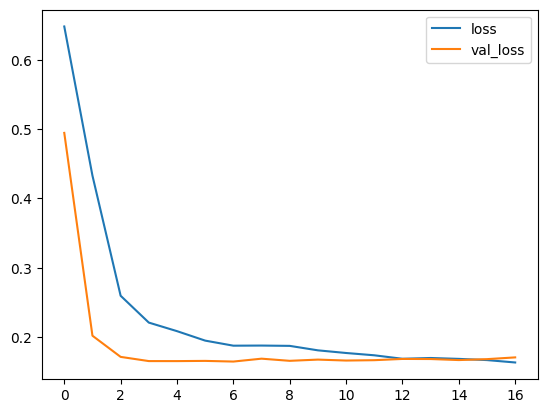

In [ ]:
# training and validation losses versus epochs
losses.plot()

In [ ]:
y_pred_keras =(model.predict(X_test) > 0.5).astype("int32")

76/76 [==============================] - 0s 2ms/step


In [ ]:

print(classification_report(y_test,y_pred_keras))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1132
           1       0.95      0.93      0.94      1298

    accuracy                           0.94      2430
   macro avg       0.94      0.94      0.94      2430
weighted avg       0.94      0.94      0.94      2430



In [ ]:

print(confusion_matrix(y_test,y_pred_keras))

[[1075   57]
 [  92 1206]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred_keras)
print("\nAccuracy:", accuracy)


Accuracy: 0.9386831275720164


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

76/76 [==============================] - 0s 1ms/step
ROC AUC:  0.9831366004780391


76/76 [==============================] - 0s 1ms/step


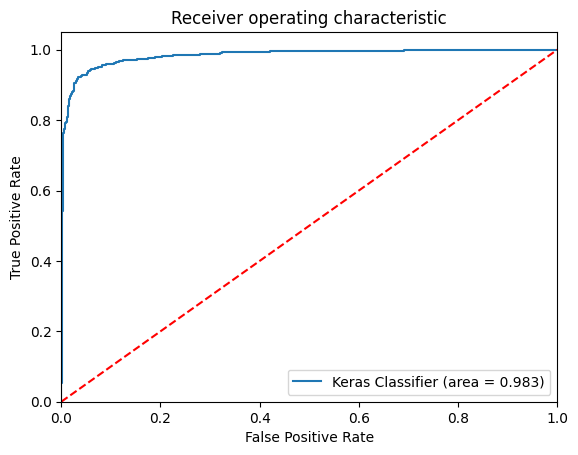

In [ ]:
keras_roc_auc = roc_auc_score(y_test, model.predict(X_test))
keras_fpr, keras_tpr, thresholds = roc_curve(y_test, model.predict(X_test))

plt.figure()
plt.plot(keras_fpr, keras_tpr, label='Keras Classifier (area = %0.3f)' % keras_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Final ROC AUC Curve**

76/76 [==============================] - 0s 1ms/step


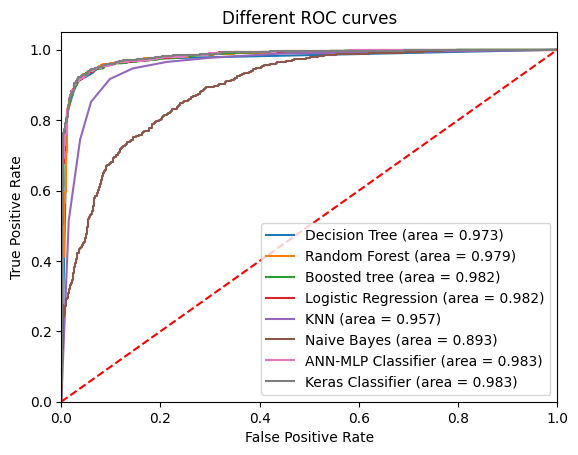

In [ ]:
# Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])

# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

# Logistic Regression
log_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# KNN
kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Naive Bayes
nb_roc_auc = roc_auc_score(y_test, Naive_bayes_pred.predict_proba(X_test)[:, 1])
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, Naive_bayes_pred.predict_proba(X_test)[:, 1])

# ANN
MLPC_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1])
mlpc_fpr, mlpc_tpr, thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])

# Keras Classification
keras_roc_auc = roc_auc_score(y_test, model.predict(X_test))
keras_fpr, keras_tpr, thresholds = roc_curve(y_test, model.predict(X_test))


plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.3f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.3f)' % bt_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % log_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.3f)' % kNN_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.3f)' % nb_roc_auc)
plt.plot(mlpc_fpr, mlpc_tpr, label='ANN-MLP Classifier (area = %0.3f)' % MLPC_roc_auc)
plt.plot(keras_fpr, keras_tpr, label='Keras Classifier (area = %0.3f)' % keras_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Different ROC curves')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In our model, the ANN and Keras Classifier have the best discriminative power between recommended and not recommended. Naive Bayes has the lowest discriminative power.